**EVALUATING THE PERFORMANCE OF 3 REGRESSION MODELS ON BIKE SHARE PREDICTION FOR SEOUL, SOUTH KOREA.**

##Methodology Summary##

Clean the data: 
    #replace categorical data points to numerical data-points 
    #categorizing date to month, e.g. 1/12/17 will be 12, and so on
    #data shuffling of rows  to improve geenralizability and reduce bias 

Data split: Train, test, validation (ensure random state)

Create models including dummy model 
    #Decision Tree regressor
    #Polynomial Regressor
    #Dummy model

Fit models to data, use model to predict, get each model's performance 
    #Regression performance metrics: MSE, R squared, RMSE, MAE, Accuracy of prediction (compare all models)

Hyperparameter tuning to see which parameter values maximize performance for each model 
    #DecisionTree : max depth
    #Polynomial: Degree order 

Cross Validation (for model generalization) to make sure our performance is the same across splits of the data 


**DATA CLEANING AND PREPARATION**

In [2]:
#import librarires 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #import others too 
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #import others too 
from sklearn.dummy import DummyRegressor 


#read csv 
raw_data = pd.read_csv('/content/coursework_other.csv')

raw_data[raw_data.isnull().any(axis=1)] #any missing values? no missing values in data 

raw_data['Holiday'].replace({'No Holiday': 0, 'Holiday': 1}, inplace=True) #changing values in holiday to numeric datapoints 
raw_data['Functioning Day'].replace({'Yes': 1, 'No': 0}, inplace=True) #change Functioning day values: Yes/no to 1 and 0 
raw_data['Seasons'].replace({'Autumn':0, 'Spring':2, 'Summer':3, 'Winter':1}, inplace=True)


In [3]:
raw_data['Date'].loc[range(744)] = 12 #categorize date by month. 1/12/17 will be 12, and so on
raw_data['Date'].loc[744:1487] = 1
raw_data['Date'].loc[1488:2159] = 2
raw_data['Date'].loc[2160:2903] = 3
raw_data['Date'].loc[2904:3623] = 4
raw_data['Date'].loc[3624:4367] = 5
raw_data['Date'].loc[4368:5087] = 6
raw_data['Date'].loc[5088:5831] = 7
raw_data['Date'].loc[5832:6575] = 8
raw_data['Date'].loc[6576:7295] = 9
raw_data['Date'].loc[7296:8039] = 10
raw_data['Date'].loc[8040:8759] = 11
raw_data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1
8756,11,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1
8757,11,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1
8758,11,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1


In [4]:
#SHUFFLE DATA
shuffled_rawD = raw_data.sample(frac=1, random_state = 10).reset_index(drop=True) #shuffle all rows and reset index 
shuffled_rawD


#seperate x and y variables 
yvar = shuffled_rawD["Rented Bike Count"]
xvar = shuffled_rawD.drop('Rented Bike Count', axis=1, inplace = False)
xvar
yvar

#Train test split - train, test, validation (specify random state)

Xtr, Xtest, Ytr, Ytest = train_test_split(xvar, yvar, test_size = 0.2, random_state = 10)




**POLYNOMIAL REGRESSION**

Text(0, 0.5, 'MSE')

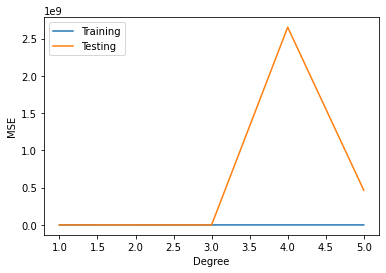

In [5]:
#Polynomial Regression 

regr = linear_model.LinearRegression()

mse_tr = []
mse_test = []
max_deg = 5
for i in range(max_deg):  #we are about to cross validation to find the degree of the polynomial that best fits this data.
    poly=PolynomialFeatures(degree=i+1)
    Xtrain_new = poly.fit_transform(Xtr) 
    Xval_new = poly.fit_transform(Xtest)
    mode = regr.fit(Xtrain_new, Ytr)
    pred_tr = mode.predict(Xtrain_new)
    pred_v = mode.predict(Xval_new)
    mse_tr.append(mean_squared_error(pred_tr, Ytr))
    mse_test.append(mean_squared_error(pred_v, Ytest))

plt.plot(range(1, max_deg+1), mse_tr, label='Training')
plt.plot(range(1, max_deg+1), mse_test, label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE')


#display results like charts in worksheet 14? to compare models to each other 
#poly=PolynomialFeatures(degree=1)
#Xtest_new = poly.fit_transform(Xtest) #evaluating performance of our model at specific chose degree 
#regr.fit(Xtest_new, Ytest) #you have to fit to test data first 
#pred_test = regr.predict(Xtest_new)
#print(f'mean squared error= {mean_squared_error(Ytest, pred_test):.4f}') #tell the report the MSE when we used a random degree such as 1. MSE is higher here. 
#print(f'R^2={r2_score(Ytest, pred_test, ):.4f}') #th
#print(f'mean absolute error={mean_absolute_error(Ytest, pred_test):.4f}') 


Text(0, 0.5, 'R-Squared')

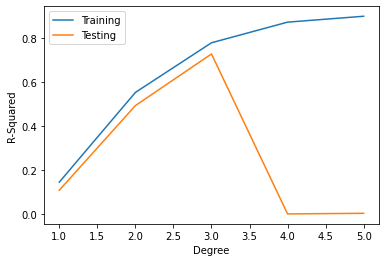

In [6]:

#poly=PolynomialFeatures(degree=5)
#Xtest_new = poly.fit_transform(Xtest) #evaluating performance of our model at specific chose degree 
#regr.fit(Xtest_new, Ytest) #you have to fit to test data first 
#pred_test = regr.predict(Xtest_new)
#print(f'mean squared error= {mean_squared_error(Ytest, pred_test):.4f}') #the MSE at degree 2 is 149939.2821, tell the 
#report the MSE when we used a random degree such as 1
#print(f'R^2={r2_score(Ytest, pred_test):.4f}') #th
#print(f'mean absolute error={mean_absolute_error(Ytest, pred_test):.4f}') 


r2_tr = []
r2_test = []
max_deg = 5
for i in range(max_deg):  #we are about to cross validation to find the degree of the polynomial that best fits this data.
    poly=PolynomialFeatures(degree=i+1)
    Xtrain_new = poly.fit_transform(Xtr) 
    Xval_new = poly.fit_transform(Xtest)
    mode = regr.fit(Xtrain_new, Ytr)
    pred_tr = mode.predict(Xtrain_new)
    pred_v = mode.predict(Xval_new)
    r2_tr.append(r2_score(pred_tr, Ytr))
    r2_test.append(r2_score(pred_v, Ytest))

plt.plot(range(1, max_deg+1), r2_tr, label='Training')
plt.plot(range(1, max_deg+1), r2_test, label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('R-Squared')



Text(0, 0.5, 'MAE')

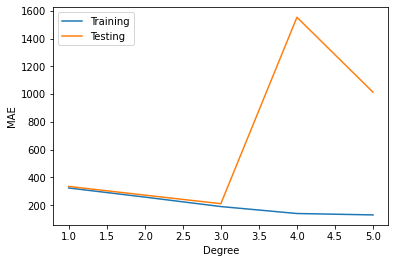

In [7]:
mae_tr = []
mae_test = []
max_deg = 5
for i in range(max_deg):  #we are about to cross validation to find the degree of the polynomial that best fits this data.
    poly=PolynomialFeatures(degree=i+1)
    Xtrain_new = poly.fit_transform(Xtr) 
    Xval_new = poly.fit_transform(Xtest)
    mode = regr.fit(Xtrain_new, Ytr)
    pred_tr = mode.predict(Xtrain_new)
    pred_v = mode.predict(Xval_new)
    mae_tr.append(mean_absolute_error(pred_tr, Ytr))
    mae_test.append(mean_absolute_error(pred_v, Ytest))

plt.plot(range(1, max_deg+1), mae_tr, label='Training')
plt.plot(range(1, max_deg+1), mae_test, label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MAE')



**DECISION TREE REGRESSOR**

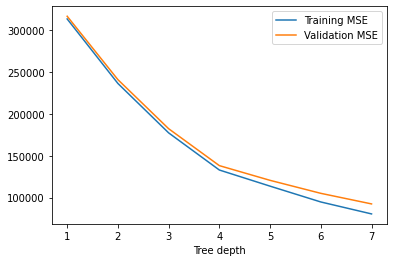

In [8]:

kf = KFold(n_splits=10, random_state=63, shuffle=True) #random state means we will get exactly the same splits every time we run this 
max_d = 7
train_mse = [[] for _ in range(max_d)]
val_mse = [[] for _ in range(max_d)]

for d in range(max_d):
  dtr = DecisionTreeRegressor(max_depth=d+1)
  for train_index, val_index in kf.split(Xtr):
      Xtrain, Xval = Xtr.iloc[train_index], Xtr.iloc[val_index] #Xtrain and Xval are data we train and test at each iteration respectively 
      ytrain, yval = Ytr.iloc[train_index], Ytr.iloc[val_index]
      dtr.fit(Xtrain, ytrain)

      pred_train = dtr.predict(Xtrain)    
      pred_val = dtr.predict(Xval) 
      train_mse[d].append(mean_squared_error(ytrain, pred_train))
      val_mse[d].append(mean_squared_error(yval, pred_val))

train_mse_mean = np.mean(train_mse, axis=1)
train_mse_stdev = np.std(train_mse, axis=1)
val_mse_mean = np.mean(val_mse, axis=1)
val_mse_stdev = np.std(val_mse, axis=1)

# The arrays of means and standard deviation should have shape (max_d, ). The following will generate an error if not.
assert(np.shape(train_mse_mean)==(max_d,))
assert(np.shape(train_mse_stdev)==(max_d,))
assert(np.shape(val_mse_mean)==(max_d,))
assert(np.shape(val_mse_stdev)==(max_d,))

fig2=plt.figure()
x = list(range(1,max_d+1))
plt.plot(x,train_mse_mean, label = 'Training MSE')
plt.plot(x,val_mse_mean, label = 'Validation MSE')
plt.xlabel('Tree depth')
plt.xticks(x)
plt.legend()


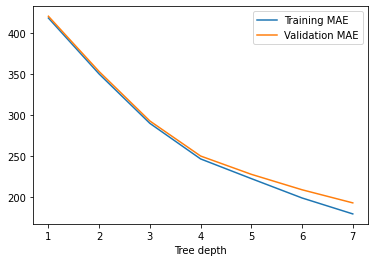

In [9]:
kf = KFold(n_splits=10, random_state=63, shuffle=True) #random state means we will get exactly the same splits every time we run this 
max_d = 7
train_mae = [[] for _ in range(max_d)]
val_mae = [[] for _ in range(max_d)]

for d in range(max_d):
  dtr = DecisionTreeRegressor(max_depth=d+1)
  for train_index, val_index in kf.split(Xtr):
      Xtrain, Xval = Xtr.iloc[train_index], Xtr.iloc[val_index] #Xtrain and Xval are data we train and test at each iteration respectively 
      ytrain, yval = Ytr.iloc[train_index], Ytr.iloc[val_index]
      dtr.fit(Xtrain, ytrain)

      pred_train = dtr.predict(Xtrain)    
      pred_val = dtr.predict(Xval) 
      train_mae[d].append(mean_absolute_error(ytrain, pred_train))
      val_mae[d].append(mean_absolute_error(yval, pred_val))

train_mae_mean = np.mean(train_mae, axis=1)
train_mae_stdev = np.std(train_mae, axis=1)
val_mae_mean = np.mean(val_mae, axis=1)
val_mae_stdev = np.std(val_mae, axis=1)

# The arrays of means and standard deviation should have shape (max_d, ). The following will generate an error if not.
assert(np.shape(train_mae_mean)==(max_d,))
assert(np.shape(train_mae_stdev)==(max_d,))
assert(np.shape(val_mae_mean)==(max_d,))
assert(np.shape(val_mae_stdev)==(max_d,))

fig2=plt.figure()
x = list(range(1,max_d+1))
plt.plot(x,train_mae_mean, label = 'Training MAE')
plt.plot(x,val_mae_mean, label = 'Validation MAE')
plt.xlabel('Tree depth')
plt.xticks(x)
plt.legend()

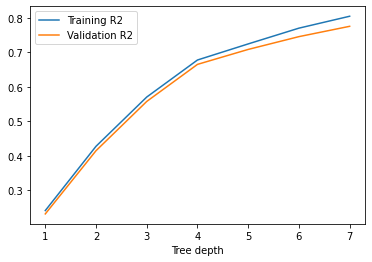

In [10]:
kf = KFold(n_splits=10, random_state=63, shuffle=True) #random state means we will get exactly the same splits every time we run this 
max_d = 7
train_r2 = [[] for _ in range(max_d)]
val_r2 = [[] for _ in range(max_d)]

for d in range(max_d):
  dtr = DecisionTreeRegressor(max_depth=d+1)
  for train_index, val_index in kf.split(Xtr):
      Xtrain, Xval = Xtr.iloc[train_index], Xtr.iloc[val_index] #Xtrain and Xval are data we train and test at each iteration respectively 
      ytrain, yval = Ytr.iloc[train_index], Ytr.iloc[val_index]
      dtr.fit(Xtrain, ytrain)

      pred_train = dtr.predict(Xtrain)    
      pred_val = dtr.predict(Xval) 
      train_r2[d].append(r2_score(ytrain, pred_train))
      val_r2[d].append(r2_score(yval, pred_val))

train_r2_mean = np.mean(train_r2, axis=1)
train_r2_stdev = np.std(train_r2, axis=1)
val_r2_mean = np.mean(val_r2, axis=1)
val_r2_stdev = np.std(val_r2, axis=1)

# The arrays of means and standard deviation should have shape (max_d, ). The following will generate an error if not.
assert(np.shape(train_r2_mean)==(max_d,))
assert(np.shape(train_r2_stdev)==(max_d,))
assert(np.shape(val_r2_mean)==(max_d,))
assert(np.shape(val_r2_stdev)==(max_d,))

fig2=plt.figure()
x = list(range(1,max_d+1))
plt.plot(x,train_r2_mean, label = 'Training R2')
plt.plot(x,val_r2_mean, label = 'Validation R2')
plt.xlabel('Tree depth')
plt.xticks(x)
plt.legend()

**DUMMY MODEL**

Text(0, 0.5, 'MAE')

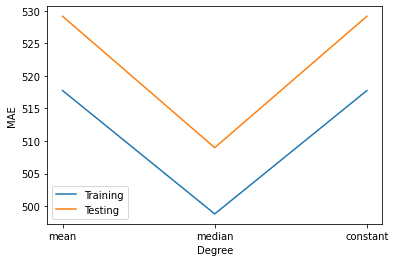

In [11]:
mae_tr = []
mae_test = []
list = ['mean', 'median', 'constant']

Y = np.mean(Ytr)

for i in list[0:3]:  #we are about to cross validation to find the degree of the polynomial that best fits this data.
    dum = DummyRegressor(strategy = i, constant = Y)
    model = dum.fit(Xtr, Ytr)
    ypred_tr = model.predict(Xtr)
    ypred_tst = model.predict(Xtest)
    mae_tr.append(mean_absolute_error(ypred_tr, Ytr))
    mae_test.append(mean_absolute_error(ypred_tst, Ytest))

plt.plot(list, mae_tr, label='Training')
plt.plot(list, mae_test, label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

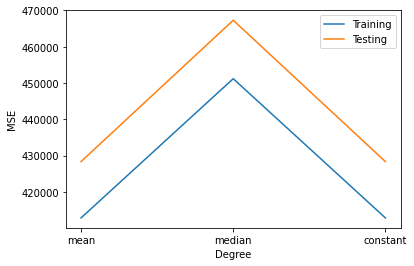

In [12]:
mse_tr = []
mse_test = []
list = ['mean', 'median', 'constant']
for i in list[0:3]:  #we are about to cross validation to find the degree of the polynomial that best fits this data.
    dum = DummyRegressor(strategy = i, constant = Y)
    model = dum.fit(Xtr, Ytr)
    ypred_tr = model.predict(Xtr)
    ypred_tst = model.predict(Xtest)
    mse_tr.append(mean_squared_error(ypred_tr, Ytr))
    mse_test.append(mean_squared_error(ypred_tst, Ytest))

plt.plot(list, mse_tr, label='Training')
plt.plot(list, mse_test, label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE')

Text(0, 0.5, 'R2')

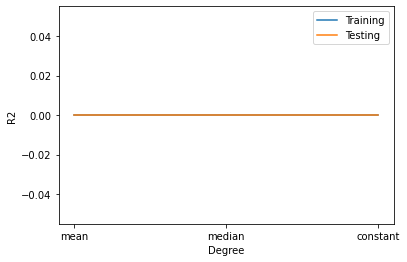

In [13]:
r2_tr = []
r2_test = []
list = ['mean', 'median', 'constant']
for i in list[0:3]:  #we are about to cross validation to find the degree of the polynomial that best fits this data.
    dum = DummyRegressor(strategy = i, constant = Y)
    model = dum.fit(Xtr, Ytr)
    ypred_tr = model.predict(Xtr)
    ypred_tst = model.predict(Xtest)
    r2_tr.append(r2_score(ypred_tr, Ytr))
    r2_test.append(r2_score(ypred_tst, Ytest))

plt.plot(list, r2_tr, label='Training')
plt.plot(list, r2_test, label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('R2')

COMPARING ALL MODELS AT THEIR IDEAL PARAMETER VALUES 

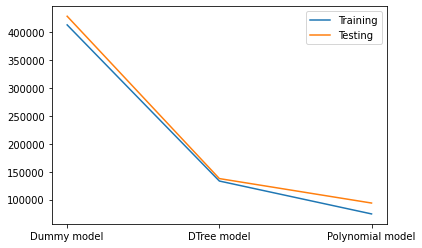

In [14]:

regr = linear_model.LinearRegression()

#Polynomial
poly_mse_tr = []
poly_mse_test = []
poly_ideal=PolynomialFeatures(degree=3)
Xtrain = poly_ideal.fit_transform(Xtr) 
Xval_new = poly_ideal.fit_transform(Xtest)
mode = regr.fit(Xtrain, Ytr)
pred_tr = mode.predict(Xtrain)
pred_v = mode.predict(Xval_new)
poly_mse_tr.append(mean_squared_error(pred_tr, Ytr))
poly_mse_test.append(mean_squared_error(pred_v, Ytest))



#DecisionTree
dtr_mse_tr = []
dtr_mse_test = []
dtr = DecisionTreeRegressor(max_depth=4)
mode_dtr = dtr.fit(Xtr, Ytr)
ypred_tr = mode_dtr.predict(Xtr)
ypred_tst = mode_dtr.predict(Xtest)
dtr_mse_tr.append(mean_squared_error(ypred_tr, Ytr))
dtr_mse_test.append(mean_squared_error(ypred_tst, Ytest))

#Dummy
dum_mse_tr = []
dum_mse_test = []
ideal_dum = DummyRegressor(strategy = 'mean')
model = ideal_dum.fit(Xtr, Ytr)
ypred_dum_tr = model.predict(Xtr)
ypred_dum_tst = model.predict(Xtest)
dum_mse_tr.append(mean_squared_error(ypred_dum_tr, Ytr))
dum_mse_test.append(mean_squared_error(ypred_dum_tst, Ytest))


labels=['Dummy model','DTree model','Polynomial model']
train = [dum_mse_tr, dtr_mse_tr, poly_mse_tr]
test=[dum_mse_test, dtr_mse_test, poly_mse_test]
#plt.boxplot(box_plot_data,labels=['dummy','DTree','Poly'], showcaps=True, showbox=True)
#plt.show()


plt.plot(labels, train, label='Training')
plt.plot(labels, test, label='Testing')
plt.legend()
xlabel = 'AI models'
ylabel = 'Mean Squared Error'
title = 'Comparison of AI model performances'
plt.show()